In [1]:
import matplotlib.pyplot as plt

from src.utils import *
import os
import IPython.display as ipd
import logging
from src.resnet_model import SpectrogramModel
from src.SENet.SENet_model import se_resnet34_custom
import torch.nn as nn
import librosa


logging.getLogger('numba').setLevel(logging.WARNING)
logging.getLogger('matplotlib.font_manager').disabled = True
logging.getLogger('matplotlib.colorbar').disabled = True
logging.getLogger('matplotlib.pyplot').disabled = True

In [2]:
config_path = '../config/residualnet_train_config.yaml'
config_res = read_yaml(config_path)
seed_everything(1234)
set_gpu(-1)
plt.style.use('dark_background')
device = 'cuda' if torch.cuda.is_available() else 'cpu'

GPU selected: 1 - Quadro P6000


In [5]:
# load one file
file_number = 1611480
label = np.array([1])
path_to_audio = f'/nas/home/wwang/SpecResNet/attacks/FGSM_ResNet_v0_pow/FGSM_ResNet_v0_whole_pow_3dot0/FGSM_ResNet_v0_pow_LA_E_{file_number}_3dot0.flac'
path_to_spec = f'/nas/home/wwang/SpecResNet/attacks/FGSM_ResNet_v0_pow/FGSM_ResNet_v0_whole_pow_3dot0/spec/FGSM_ResNet_v0_pow_LA_E_{file_number}_3dot0.npy'

In [6]:
# load the spec
spec = np.load(path_to_spec)

In [7]:
# load the audio
audio, _ = librosa.load(path_to_audio, sr=16000, mono=True)

win_length = 2048
n_fft = 2048
hop_length = 512
window = 'hann'

# compute power spectrogram
p_mag_spec = librosa.stft(audio, n_fft=n_fft, win_length=win_length, hop_length=hop_length, window=window, center=True)
b = np.abs(p_mag_spec) ** 2
pow_spec = librosa.power_to_db(b, ref=np.max)

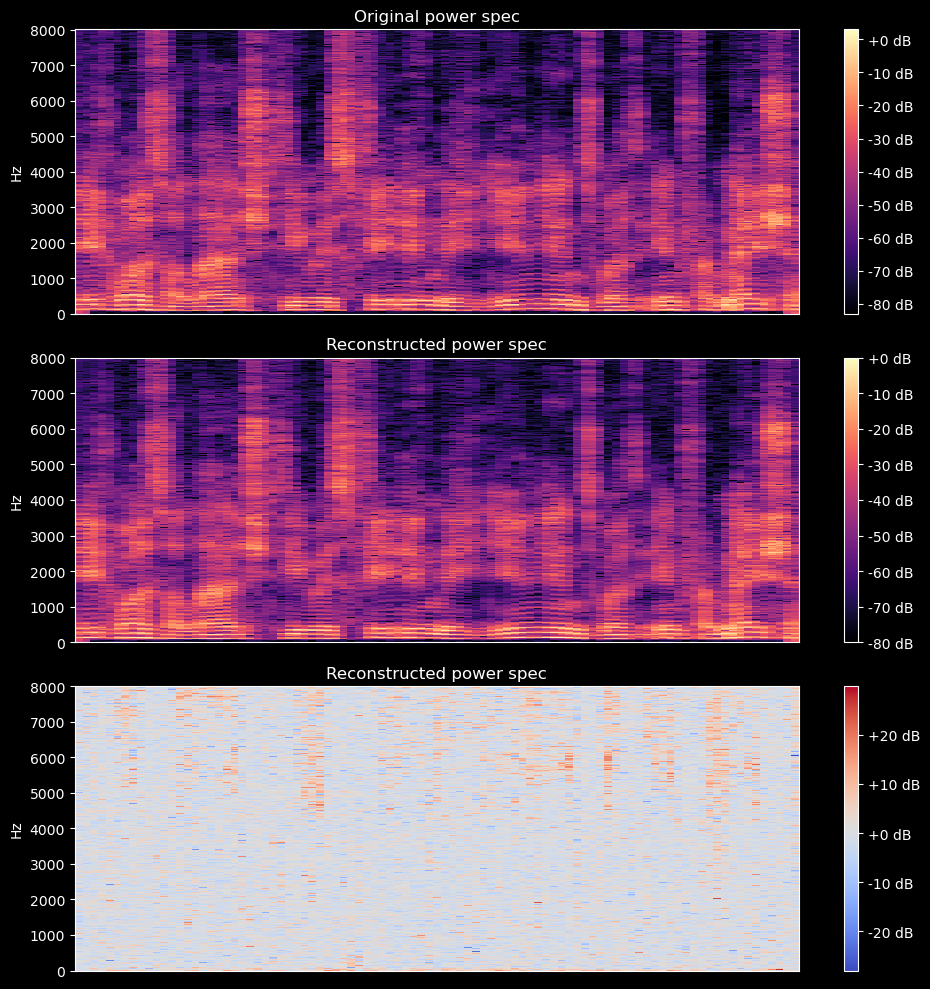

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
librosa.display.specshow(spec, sr=16000,  y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Saved power spec')
plt.subplot(3,1,2)
librosa.display.specshow(pow_spec, sr=16000,  y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed power spec')
plt.subplot(3,1,3)
librosa.display.specshow(pow_spec - spec, sr=16000,  y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed power spec')
plt.tight_layout()
plt.show()

In [14]:
# load one file
file_number = 1611480
label = np.array([1])
path_to_audio = f'/nas/home/wwang/SpecResNet/attacks/FGSM_ResNet_v0_pow/FGSM_ResNet_v0_3s_pow_3dot0/FGSM_ResNet_v0_pow_LA_E_{file_number}_3dot0.flac'
path_to_spec = f'/nas/home/wwang/SpecResNet/attacks/FGSM_ResNet_v0_pow/FGSM_ResNet_v0_3s_pow_3dot0/spec/FGSM_ResNet_v0_pow_LA_E_{file_number}_3dot0.npy'

In [15]:
# load the spec
spec = np.load(path_to_spec)
# load the audio
audio, _ = librosa.load(path_to_audio, sr=16000, mono=True)

win_length = 2048
n_fft = 2048
hop_length = 512
window = 'hann'

# compute power spectrogram
p_mag_spec = librosa.stft(audio, n_fft=n_fft, win_length=win_length, hop_length=hop_length, window=window, center=True)
b = np.abs(p_mag_spec) ** 2
pow_spec = librosa.power_to_db(b, ref=np.max)

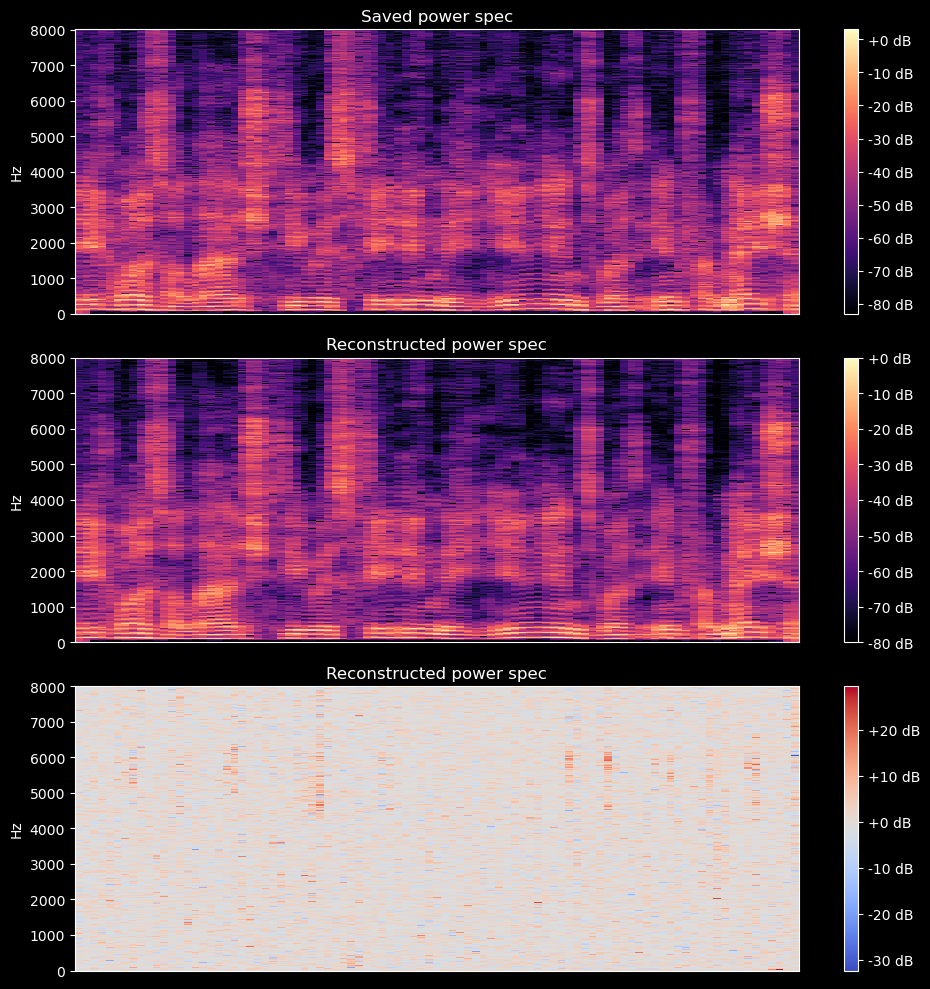

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
librosa.display.specshow(spec, sr=16000,  y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Saved power spec')
plt.subplot(3,1,2)
librosa.display.specshow(pow_spec, sr=16000,  y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed power spec')
plt.subplot(3,1,3)
librosa.display.specshow(pow_spec - spec, sr=16000,  y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed power spec')
plt.tight_layout()
plt.show()

In [17]:
# load one file
file_number = 1611480
label = np.array([1])
path_to_audio = f'/nas/home/wwang/SpecResNet/attacks/FGSM_SENet_v0_pow/FGSM_SENet_v0_3s_pow_3dot0/FGSM_SENet_v0_pow_LA_E_{file_number}_3dot0.flac'
path_to_spec = f'/nas/home/wwang/SpecResNet/attacks/FGSM_SENet_v0_pow/FGSM_SENet_v0_3s_pow_3dot0/spec/FGSM_SENet_v0_pow_LA_E_{file_number}_3dot0.npy'

In [18]:
# load the spec
spec = np.load(path_to_spec)
# load the audio
audio, _ = librosa.load(path_to_audio, sr=16000, mono=True)

win_length = 2048
n_fft = 2048
hop_length = 512
window = 'hann'

# compute power spectrogram
p_mag_spec = librosa.stft(audio, n_fft=n_fft, win_length=win_length, hop_length=hop_length, window=window, center=True)
b = np.abs(p_mag_spec) ** 2
pow_spec = librosa.power_to_db(b, ref=np.max)

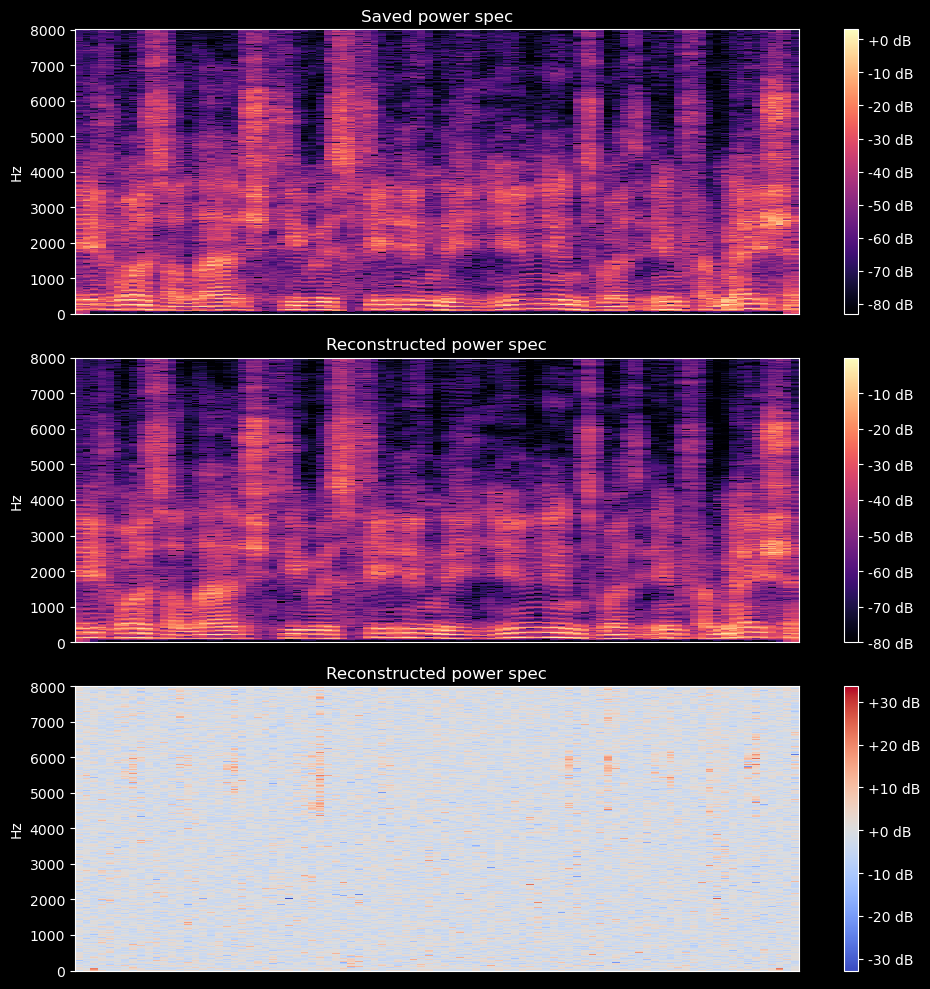

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
librosa.display.specshow(spec, sr=16000,  y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Saved power spec')
plt.subplot(3,1,2)
librosa.display.specshow(pow_spec, sr=16000,  y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed power spec')
plt.subplot(3,1,3)
librosa.display.specshow(pow_spec - spec, sr=16000,  y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed power spec')
plt.tight_layout()
plt.show()